In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

In [2]:
data_root_path = "D:/oxford_pets_data"

In [24]:
img_paths = [fn.replace("\\", "/") for fn in glob(f"{data_root_path}/images/*.jpg")]
label_paths = [fn.replace("\\", "/") for fn in glob(f"{data_root_path}/annotations/trimaps/[!._]*.png")]

# Validate images match labels in order & count

In [38]:
def get_img_id(img_path):
    return img_path.split("/")[-1].split(".")[0]

In [45]:
assert(all([get_img_id(img_paths[i]) == get_img_id(label_paths[i]) for i in range(len(img_paths))]))

In [46]:
assert(len(img_paths) == len(label_paths))

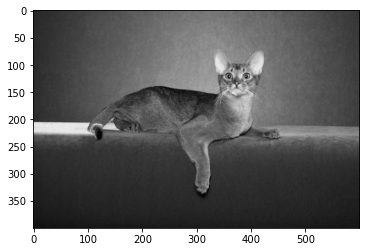

In [48]:
img = cv2.imread(img_paths[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap="gray")

In [65]:
def map2bin(lab, fg_vals, bg_vals, fg=1, bg=0):
    fg_mask = np.isin(lab, fg_vals)
    bg_mask = np.isin(lab, bg_vals)
    lab_c = lab.copy()
    lab_c[fg_mask] = fg
    lab_c[bg_mask] = bg
    return lab_c

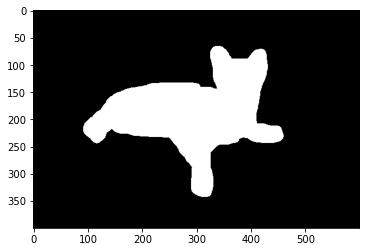

In [69]:
# Trimap:
# 1 -> foreground
# 2 -> background
# 3 -> foreground outline

lab = cv2.imread(label_paths[0])
lab = map2bin(lab, [1, 3], [2])
plt.imshow(lab * 255, cmap="gray")
plt.show()
